In [13]:
from Bio.Seq import Seq
from collections import Counter
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.SeqUtils import GC
from Bio.SeqUtils import MeltingTemp
from Levenshtein import distance

In [ ]:
fasta = SeqIO.read("./session_5/sequence.fasta", "fasta")
Seq_Z = fasta.seq

# Cari length
length = len(Seq_Z)
# misal cari index pertama dari AGCT
first_index = Seq_Z.find("AGCT")
# Bikin sequence pake gabungan : bisa jadi 2 fasta digabungin jd satu
# Bisa jadi satu fasta tapi dibagi 2
# misal mau ambil 50 pertama dan 20 terakhir
Seq_A = Seq_Z[:50]
Seq_B = Seq_Z[-20:]
# Kalau kasusnya nanti adalah : ambil dari basa ke 4 hingga ke 10
# brarti jadinya :
# Seq_B = Seq_Z[3:10]
# Kalau ada permainan kata : ambil dari index ke 4 hingga ke 10
# brarti nanti :
# Seq_B = Seq_Z[4:11]

<BarContainer object of 4 artists>

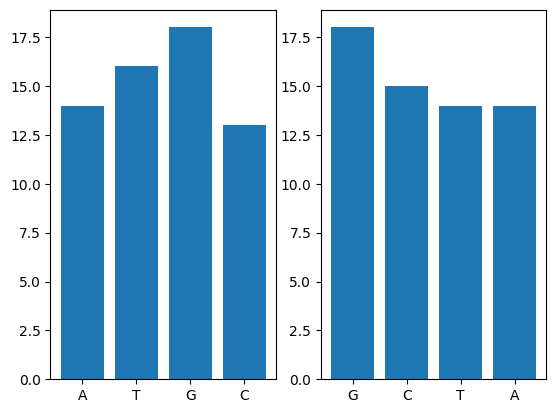

In [16]:
freq_A = Counter(Seq_A)
freq_B = Counter(Seq_B)

freq_keys_A = freq_A.keys()
freq_keys_B = freq_B.keys()

freq_values_A = freq_A.values()
freq_values_B = freq_B.values()

_,axs = plt.subplots(1,2)
axs[0].bar(freq_keys_A,freq_values_A)
axs[1].bar(freq_keys_B,freq_values_B)

In [ ]:
GC_A = GC(Seq_A)
GC_B = GC(Seq_B)

AT_A = 100 - GC_A
AT_B = 100 - GC_B

In [21]:
MeltTemp_A = MeltingTemp.Tm_NN(Seq_A)
MeltTemp_B = MeltingTemp.Tm_NN(Seq_B)
print(MeltTemp_A, MeltTemp_B)

71.87011297788149 73.3733339885701


In [ ]:
from Bio.SeqUtils import seq3
mRNA_A = Seq_A.transcribe()
mRNA_B = Seq_B.transcribe()
print(mRNA_A,"\n"+ mRNA_B)

Amino_Acid_A = seq3(mRNA_A)
Amino_Acid_B = seq3(mRNA_B)
print("\n"+ Amino_Acid_A,"\n"+ Amino_Acid_B)


AUGCGUACGUUAGCCUAGGCUAACGUAGGCUUACGGUAGCUAGCUGAUCGUACGUAGCUAG 
GCUAGCAUCGGAUACGUUAGGCCAUGCGUACCUGGAAUCGUACCGUGGAUCGAUCAGGUAC

AlaSecGlyCysGlySecAlaCysGlySecSecAlaGlyCysCysSecAlaGlyGlyCysSecAlaAlaCysGlySecAlaGlyGlyCysSecSecAlaCysGlyGlySecAlaGlyCysSecAlaGlyCysSecGlyAlaSecCysGlySecAlaCysGlySecAlaGlyCysSecAlaGly 
GlyCysSecAlaGlyCysAlaSecCysGlyGlyAlaSecAlaCysGlySecSecAlaGlyGlyCysCysAlaSecGlyCysGlySecAlaCysCysSecGlyGlyAlaAlaSecCysGlySecAlaCysCysGlySecGlyGlyAlaSecCysGlyAlaSecCysAlaGlyGlySecAlaCys


In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# contoh kasus global alignment, match 2 mismatch -1
global_alignment_score = pairwise2.align.globalmx(Seq_A, Seq_B, 2, -1, one_alignment_only = True, score_only = True)
# for i in global_alignment_score:
#     print(i)
#     print(format_alignment(*i))
print(global_alignment_score)

84.0


In [31]:
Levenshtein_distance = distance(Seq_A, Seq_B)
print(Levenshtein_distance)

30
